# 1 Data Extraction and Cleaning

In [111]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Function for extracting one table

In [112]:
def extract_table(url):
    # use beautiful soup
    page = requests.get(url) #200 is fine
    soup = BeautifulSoup(page.text, 'html')
    table = soup.find('table', class_='kick__table kick__table--ranking kick__table--alternate kick__table--resptabelle')

    # get titles
    titles = table.find_all('th')
    titles = [t.text.strip() for t in titles] #list comprehension
    titles
    
    # create new data frame
    df = pd.DataFrame(columns = titles) 
    
    # fill rows with data
    col_data = table.find_all('tr')
    for row in col_data[1:]:
        row_data = row.find_all('td')
        ind_row_data = [r.text.strip() for r in row_data]
        
        #insert in dataframe
        length = len(df)
        df.loc[length] = ind_row_data
    
    # add year to this table
    df['Year'] = url[-7:]
        
    return df

In [113]:
df = extract_table('https://www.kicker.de/bundesliga/tabelle/2000-01')
df

,Pl.,,,Team,Sp.,ss-u-n,U,N,Tore,Diff.,Punkte,Year
0,1,,,"Bayern (M, P)\nBayern München (M, P)",34,19-6-9\n19,6,9,62:37,25,63,2000-01
1,2,,,Schalke\nFC Schalke 04,34,18-8-8\n18,8,8,65:35,30,62,2000-01
2,3,,,Dortmund\nBorussia Dortmund,34,16-10-8\n16,10,8,62:42,20,58,2000-01
3,4,,,Leverkusen\nBayer 04 Leverkusen,34,17-6-11\n17,6,11,54:40,14,57,2000-01
4,5,,,Hertha\nHertha BSC,34,18-2-14\n18,2,14,58:52,6,56,2000-01
5,6,,,Freiburg\nSC Freiburg,34,15-10-9\n15,10,9,54:37,17,55,2000-01
6,7,,,Bremen\nWerder Bremen,34,15-8-11\n15,8,11,53:48,5,53,2000-01
7,8,,,K'lautern\n1. FC Kaiserslautern,34,15-5-14\n15,5,14,49:54,-5,50,2000-01
8,9,,,Wolfsburg\nVfL Wolfsburg,34,12-11-11\n12,11,11,60:45,15,47,2000-01
9,10,,,Köln (N)\n1. FC Köln (N),34,12-10-12\n12,10,12,59:52,7,46,2000-01


## Function for cleaning one table

In [114]:
def clean_table(df):
    # rename columns
    df.rename(columns={'Pl.': 'Platz', 'Sp.': 'Spiele','ss-u-n': 'S', 'Diff.': 'Diff'}, inplace=True)
    df['Platz'] = df['Platz'].astype(int)
    df = df.drop('', axis=1)
    
    df['Team'] = df['Team'].str.split('\n').str[1].replace(r'\([^)]*\)', '', regex=True).str.strip()
    df['S'] = df['S'].str.split('\n').str[1].astype(int)
    df['G'] = df['Tore'].str.split(':').str[0].astype(int)
    df['A'] = df['Tore'].str.split(':').str[1].astype(int)

    df['Spiele'] = df['Spiele'].astype(int)
    df['U'] = df['U'].astype(int)
    df['N'] = df['N'].astype(int)
    df['Diff'] = df['Diff'].astype(int)
    df['Punkte'] = df['Punkte'].astype(int)
    df['U'] = df['U'].astype(int)


    df.insert(6, 'G', df.pop('G'))
    df.insert(7, 'A', df.pop('A'))
    
    return df

In [115]:
df = clean_table(df)
df

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
0,1,Bayern München,34,19,6,9,62,37,62:37,25,63,2000-01
1,2,FC Schalke 04,34,18,8,8,65,35,65:35,30,62,2000-01
2,3,Borussia Dortmund,34,16,10,8,62,42,62:42,20,58,2000-01
3,4,Bayer 04 Leverkusen,34,17,6,11,54,40,54:40,14,57,2000-01
4,5,Hertha BSC,34,18,2,14,58,52,58:52,6,56,2000-01
5,6,SC Freiburg,34,15,10,9,54,37,54:37,17,55,2000-01
6,7,Werder Bremen,34,15,8,11,53,48,53:48,5,53,2000-01
7,8,1. FC Kaiserslautern,34,15,5,14,49,54,49:54,-5,50,2000-01
8,9,VfL Wolfsburg,34,12,11,11,60,45,60:45,15,47,2000-01
9,10,1. FC Köln,34,12,10,12,59,52,59:52,7,46,2000-01


## Combining all tables into one big dataframe

In [116]:
for i in range (1, 24):
    url = 'https://www.kicker.de/bundesliga/tabelle/20' + "{:02d}".format(i) + '-' + "{:02d}".format(i+1)
    df_temp = extract_table(url)    
    df_temp = clean_table(df_temp)
    df = pd.concat([df, df_temp])

df

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
0,1,Bayern München,34,19,6,9,62,37,62:37,25,63,2000-01
1,2,FC Schalke 04,34,18,8,8,65,35,65:35,30,62,2000-01
2,3,Borussia Dortmund,34,16,10,8,62,42,62:42,20,58,2000-01
3,4,Bayer 04 Leverkusen,34,17,6,11,54,40,54:40,14,57,2000-01
4,5,Hertha BSC,34,18,2,14,58,52,58:52,6,56,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...
13,14,VfL Bochum,20,4,9,7,22,38,22:38,-16,21,2023-24
14,15,1. FC Union Berlin,20,5,3,12,19,35,19:35,-16,18,2023-24
15,16,1. FC Köln,20,3,6,11,14,34,14:34,-20,15,2023-24
16,17,1. FSV Mainz 05,20,1,9,10,15,32,15:32,-17,12,2023-24


# 2 Data Validation

## Checking for missing values

In [117]:
missing_values = df.isnull().sum()
missing_values.sum()

0

## Checking for wrong values

In [118]:
# Check if the Goal difference is calculated correctly
(df['G'] - df['A'] == df['Diff']).value_counts()

True    432
Name: count, dtype: int64

In [119]:
# Check if the number of points is calculated correctly
wrong_points = (df['S'] * 3 + df['U'] != df['Punkte'])
df[wrong_points]
# Contextual check, this team were deducted 3 points, so no error in the data: https://media.dfl.de/sites/2/2018/11/2003_Pressemitteilung-20-28.03.2003.pdf

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
14,15,1. FC Kaiserslautern *,34,11,6,17,39,62,39:62,-23,36,2003-04


In [120]:
# Check if all team names are correct
df.loc[df['Team'] == '1. FC Kaiserslautern *', 'Team'] = '1. FC Kaiserslautern'
df['Team'].unique()

array(['Bayern München', 'FC Schalke 04', 'Borussia Dortmund',
       'Bayer 04 Leverkusen', 'Hertha BSC', 'SC Freiburg',
       'Werder Bremen', '1. FC Kaiserslautern', 'VfL Wolfsburg',
       '1. FC Köln', 'TSV 1860 München', 'Hansa Rostock', 'Hamburger SV',
       'Energie Cottbus', 'VfB Stuttgart', 'SpVgg Unterhaching',
       'Eintracht Frankfurt', 'VfL Bochum', 'Bor. Mönchengladbach',
       '1. FC Nürnberg', 'FC St. Pauli', 'Hannover 96',
       'Arminia Bielefeld', '1. FSV Mainz 05', 'MSV Duisburg',
       'Alemannia Aachen', 'Karlsruher SC', 'TSG Hoffenheim',
       'FC Augsburg', 'Fortuna Düsseldorf', 'SpVgg Greuther Fürth',
       'Eintracht Braunschweig', 'SC Paderborn 07', 'FC Ingolstadt 04',
       'SV Darmstadt 98', 'RB Leipzig', '1. FC Union Berlin',
       '1. FC Heidenheim'], dtype=object)

In [121]:
# Check if each placement is occuring the same amount
df['Platz'].value_counts().unique()

array([24])

# 3 Exploratory Data Analysis

### Question: Which was the highest amount of points, draws and goals against in a single season?

In [122]:
# most points
df[df['Punkte'] == df['Punkte'].max()]

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
0,1,Bayern München,34,29,4,1,98,18,98:18,80,91,2012-13


In [123]:
# most draws
df[df['U'] == df['U'].max()]

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
11,12,Hannover 96,34,7,17,10,43,47,43:47,-4,38,2005-06


In [124]:
# most goals against
df[df['A'] == df['A'].max()]

,Platz,Team,Spiele,S,U,N,G,A,Tore,Diff,Punkte,Year
17,18,FC Schalke 04,34,3,7,24,25,86,25:86,-61,16,2020-21


# 4 Linear Regression

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Question: How many points can you expect in a season if you score x goals?

In [147]:
goals = input()

42


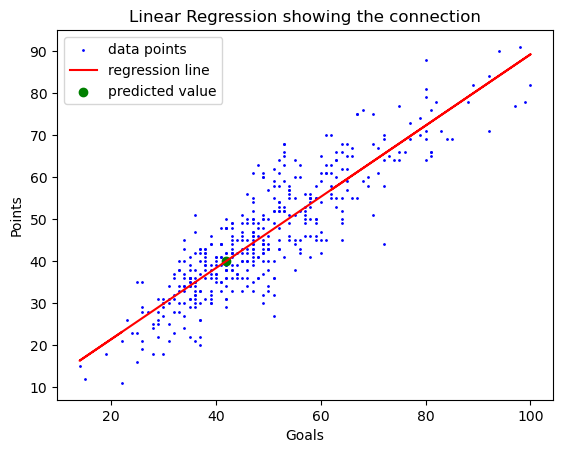

A team scoring 42 goals can expect 40 points


In [148]:
X = df['G'].values.reshape(-1, 1)
Y = df['Punkte'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

new_data = np.array([[int(goals)]])  
prediction = model.predict(new_data)

plt.scatter(X, Y, color='blue', label='data points', s=1)
plt.plot(X, model.predict(X), color='red', label='regression line')
plt.scatter(new_data, prediction, color='green', label='predicted value')
plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('Linear Regression showing the connection')
plt.legend()
plt.show()

print('A team scoring ' + goals + ' goals can expect ' + str(round(prediction.flatten()[0])) + ' points')

In [157]:
df[df['G'] == int(goals)].describe()['Punkte']

count    17.000000
mean     39.235294
std       6.398529
min      29.000000
25%      36.000000
50%      38.000000
75%      42.000000
max      50.000000
Name: Punkte, dtype: float64